# Energy Consumption Analysis with Pruning
# 
This notebook loads a CSV file with experimental results and uses the `AnalysisPlotter` class to visualize the data.


In [1]:
import sys
import os

lib_path = os.path.abspath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path.append(lib_path)

import pandas as pd
from PruneEnergyAnalizer import AnalysisPlotter,parse_model_name

In [2]:
# Load the CSV file
df = pd.read_csv("results_v15.csv")
df

,MODEL_NAME,BATCH_SIZE,Mean Time per Sample (s),FPS,STD Time per Sample (s),Mean Energy per Sample (J),STD Energy per Sample (J),Parameters,FLOPs
0,AlexNet_DATASET_random_PD1_GPR-25_PRUNED_SEED_...,1,0.001142,875.307472,1.147194e-04,0.236406,0.168893,35361496,415682832
1,AlexNet_DATASET_random_PD1_GPR-25_PRUNED_SEED_...,8,0.000140,7137.856289,9.370150e-06,0.040915,0.017821,35361496,3325462656
2,AlexNet_DATASET_random_PD3_GPR-15_PRUNED_SEED_...,1,0.001322,756.554786,4.460136e-05,0.294240,0.119529,48226817,532247967
3,AlexNet_DATASET_random_PD3_GPR-15_PRUNED_SEED_...,8,0.000173,5796.406955,6.116725e-07,0.051790,0.021548,48226817,4257983736
4,AlexNet_DATASET_random_PD5_GPR-20_PRUNED_SEED_...,1,0.001018,982.166432,9.565129e-06,0.215200,0.012262,42285583,468299627
...,...,...,...,...,...,...,...,...,...
127,AlexNet_DATASET_random_PD5_GPR-40_PRUNED_SEED_...,8,0.000141,7081.864130,8.815397e-06,0.032114,0.001091,26408660,2198515840
128,AlexNet_DATASET_random_PD5_GPR-25_PRUNED_SEED_...,1,0.001127,887.443483,6.261778e-05,0.247740,0.108922,37766321,410204109
129,AlexNet_DATASET_random_PD5_GPR-25_PRUNED_SEED_...,8,0.000152,6570.150291,7.786891e-07,0.042072,0.017161,37766321,3281632872
130,AlexNet_DATASET_random_PD5_GPR-45_PRUNED_SEED_...,1,0.001142,875.704528,1.428217e-04,0.214750,0.086183,23003626,233316474


In [3]:
df = parse_model_name(df)
df[["MODEL_NAME", "GPR", "Architecture", "Pruning Distribution"]]


,MODEL_NAME,GPR,Architecture,Pruning Distribution
0,AlexNet_DATASET_random_PD1_GPR-25_PRUNED_SEED_...,25,AlexNet,PD1
1,AlexNet_DATASET_random_PD1_GPR-25_PRUNED_SEED_...,25,AlexNet,PD1
2,AlexNet_DATASET_random_PD3_GPR-15_PRUNED_SEED_...,15,AlexNet,PD3
3,AlexNet_DATASET_random_PD3_GPR-15_PRUNED_SEED_...,15,AlexNet,PD3
4,AlexNet_DATASET_random_PD5_GPR-20_PRUNED_SEED_...,20,AlexNet,PD5
...,...,...,...,...
127,AlexNet_DATASET_random_PD5_GPR-40_PRUNED_SEED_...,40,AlexNet,PD5
128,AlexNet_DATASET_random_PD5_GPR-25_PRUNED_SEED_...,25,AlexNet,PD5
129,AlexNet_DATASET_random_PD5_GPR-25_PRUNED_SEED_...,25,AlexNet,PD5
130,AlexNet_DATASET_random_PD5_GPR-45_PRUNED_SEED_...,45,AlexNet,PD5


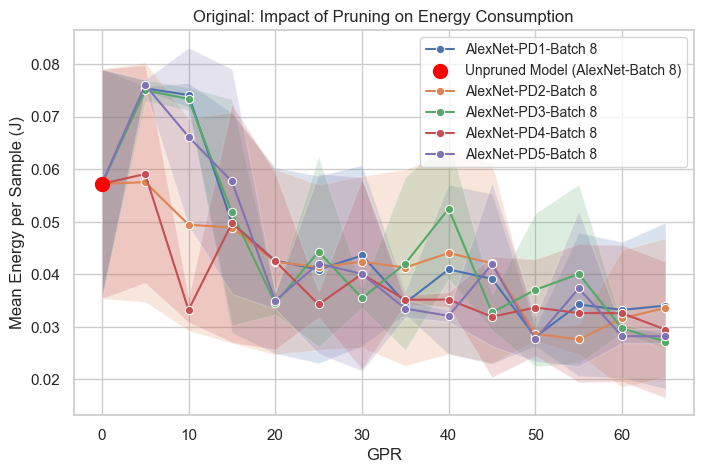

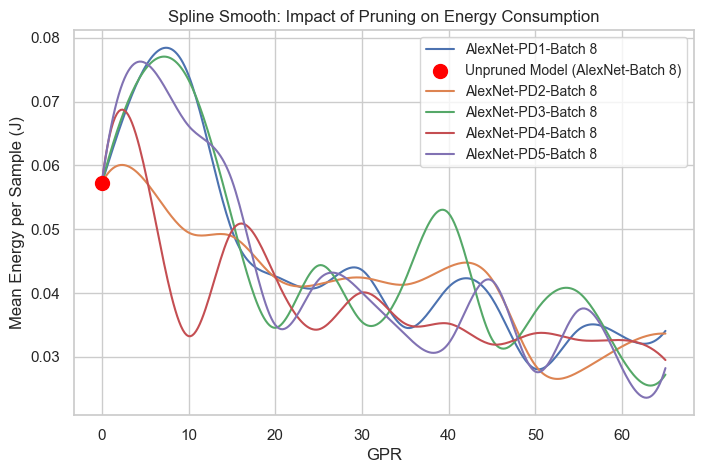

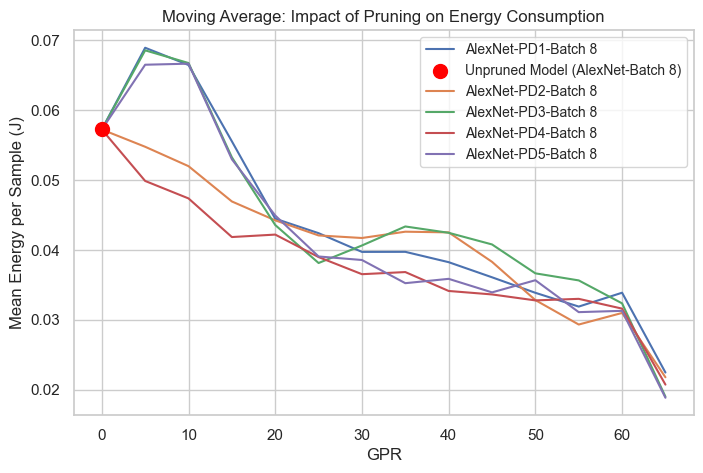

In [5]:



# Create an instance of AnalysisPlotter
plotter = AnalysisPlotter(
    dataframe=df, 
    x_column="GPR", 
    y_column="Mean Energy per Sample (J)", 
    title="Impact of Pruning on Energy Consumption"
)

# Generate the plot for a specific architecture, pruning distributions, and batch size
plotter.plot_data(
    architectures=["AlexNet"],
    pruning_distributions=["PD1", "PD2", "PD3", "PD4", "PD5"],
    batch_sizes=[8],
    patience=3,  # Number of iterations without significant improvement
    min_delta=0.05  # Minimum variation to consider stabilization
    )